# Assignment 2 - FIT3139
### By Gus Morris (30534526)

### Part 1 (6 marks) – Model selection

Present your question and state the base model you plan to extend. You should present
and explain each of the equations, either in discrete or continuous time, that describe the
base system and explain how these equations describe the dynamics. Describe your model
extension and justify how it will answer your question. You should give a written explaination
and present the updated equations for your extended model. Clearly state any assumptions
you make in your model.

### Lotka-Volterra third species extension

The Lotka-Volterra method refers to a set of mathematical equations used to model the dynamics of populations in an ecosystem, particularly the predator-prey relationship. These equations describe how the populations of a predator and its prey interact over time.

$$ \frac{dx}{dt} =  \alpha x - \beta xy, $$

$$ \frac{dy}{dt} =  \delta xy - \gamma y $$

The first equation can be intepreted as the change in population for species x is proportional to it's current population x multiplied by the species growth constant $\alpha$ subtracted by the populations of species y and x and multiplied by the predation coefficient $ \beta $

The change in population y -- the predator, is equal to the the populations of the species, multiplied by the rate of predator to prey offspring conversion that we represent with $\delta$. We then also consider the natural decay of the the prey population with $\gamma$



The original Lotka-Volterra model considers only one predator and one prey species, now consider the extension of the model to add a third species, something the original model does not consider. This addition is done in a hierarchical nature by which species z is a predator to species y, and species y is a predator to x, to which x is simply a prey

$$ \frac{dx}{dt} =   ax - bxy, $$

$$ \frac{dy}{dt} =  - cy + dxy - eyz, $$

$$ \frac{dz}{dt} =  - fz + gyz $$

The first and last equations can be intepreted the same as the original model, as they are displaying the most simplest form of prey predator relationship, identical to the original model. $\frac{dy}{dt}$ however is both a predator and a prey species. This is reflected in the equation by the $+dxy$ representing the growth rate of the species $y$ proportional to the its population and prey $x$'s population. $-eyz$ determines the reduction of the population based on predator $z$'s population

Let the function below dictate our equations for the three species model that we seek answers about. This will be used for both or continous and discrete model of simulation

In [253]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sympy as syms

# independant change rates
a, c, f = 1, 1, 1
# dependant change rates
b, d, e, g = 1, 1, 1, 1

def lotka_volterra_extension(P, t):
    dxdt = a*P[0] - b*P[0]*P[1]
    dydt = -c*P[1] + d*P[0]*P[1] - e*P[1]*P[2]
    dzdt = -f*P[2] + g*P[1]*P[2]

    return np.array([dxdt, dydt, dzdt])

### Part 2 (6 marks) - Discrete time analysis

Now that you have a coupled dynamical system set out, lets try modeling it.
Express your dynamical system in the form of difference equations, and then study the
behaviour. Do so for a variety of initial conditions and model parameters.
Plot and explain your results. Discuss how your results illuminate the question posed in
Part 1.

Let the function below dicate eulers scheme of the form:

$$ x_{i+1} = x_i + h(ax_i - bx_iy_i) $$
$$ y_{i+1} = y_i + h(-cy_i + dx_iy_i - ey_iz_i) $$
$$ z_{i+1} = z_i + h(- fz_i + gy_iz_i) $$

In [77]:
def euler(x0, y0, z0, f, h, step_max):
    t_i , x_i, y_i, z_i = 0, x0, y0, z0
    t, x, y, z = np.array([]), np.array([]), np.array([]), np.array([])

    while t_i < step_max:
        t = np.append(t, t_i)
        x = np.append(x, x_i)
        y = np.append(y, y_i)
        z = np.append(z, z_i)

        vals = f(np.array([x_i, y_i, z_i]), 1)

        x_i = x_i + h*vals[0]
        y_i = y_i + h*vals[1]
        z_i = z_i + h*vals[2]
        t_i = t_i + h

    return np.array([t, x, y, z])

The most simple expression of the equation such that:

$$ a=b=c=d=e=f=g=1 $$
$$ x=y=z=1 $$

with differing step sizes

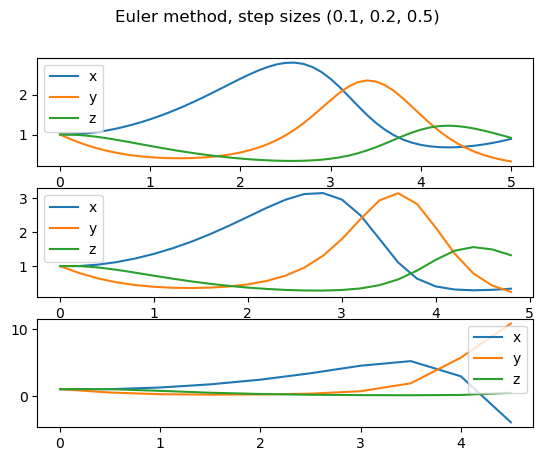

In [289]:
t_1,x_1,y_1,z_1 = euler(1, 1, 1, lotka_volterra_extension, 0.1, 5)
t_2,x_2,y_2,z_2 = euler(1, 1, 1, lotka_volterra_extension, 0.2, 5)
t_5,x_5,y_5,z_5 = euler(1, 1, 1, lotka_volterra_extension, 0.5, 5)
# plt.plot(t, x_1, label='a'), plt.plot(t, y_1, label='b'), plt.plot(t, z_1, label='c')
# plt.legend()
fig, axs = plt.subplots(3)
fig.suptitle('Euler method, step sizes (0.1, 0.2, 0.5)')
axs[0].plot(t_1, x_1, label='x'), axs[0].plot(t_1, y_1, label='y'), axs[0].plot(t_1, z_1, label='z')
axs[1].plot(t_2, x_2, label='x'), axs[1].plot(t_2, y_2, label='y'), axs[1].plot(t_2, z_2, label='z')
axs[2].plot(t_5, x_5, label='x'), axs[2].plot(t_5, y_5, label='y'), axs[2].plot(t_5, z_5, label='z')
axs[0].legend()
axs[1].legend()
axs[2].legend()

Note that these curves are still at very low values of $t$. Reason being that at larger values of $h$, the step sizes cause the value of $x$ to over-extend into the negative numbers. When we consider out Lotka-Volterra model, this is not something that would be expected as it is logically imposible to have a negative population of a species. These negative values in-turn cause unpredictable behaviour such as shooting off to infinity. The graphs are shown here to give a visual story of how eulers method acts on different values of $h$

It also gives us a better understanding why it is within our interests to reduce our value of $h$. The rest of our discrete graphs will be taken at a much more suitable value for computational analysis $h = 0.02$

Text(0.5, 0.92, 'Parametric Curve')

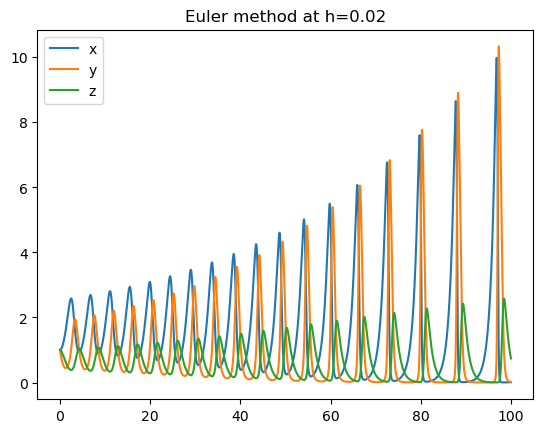

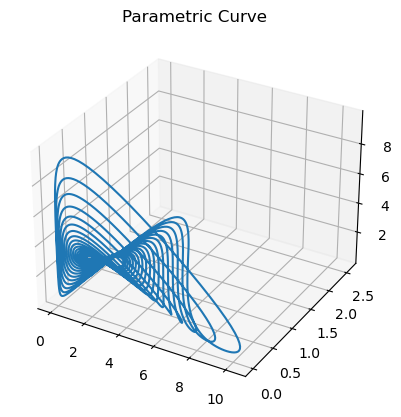

In [292]:
# independant change rates
a, c, f = 1, 1, 1
# dependant change rates
b, d, e, g = 1,1,1,1

t, x, y, z = euler(1, 1, 1, lotka_volterra_extension, 0.02, 100)
plt.plot(t, x, label='x'), plt.plot(t, y, label='y'), plt.plot(t, z, label='z')
plt.legend()
plt.title('Euler method at h=0.02')
plt.figure().add_subplot(projection='3d')
plt.plot(y, z, x, label='parametric curve')
plt.title('Parametric Curve')


The graphs above exhibit the behaviour of the system when modelled discretely. Each species has oscillations with peaks and valleys, but over time each species population tends upwards. The parametrics graph shows below, exhibits the symbiotic nature of the model, with species populaton changing with the proportions of each species.

Text(0.5, 1.0, 'Omitted Top Predator')

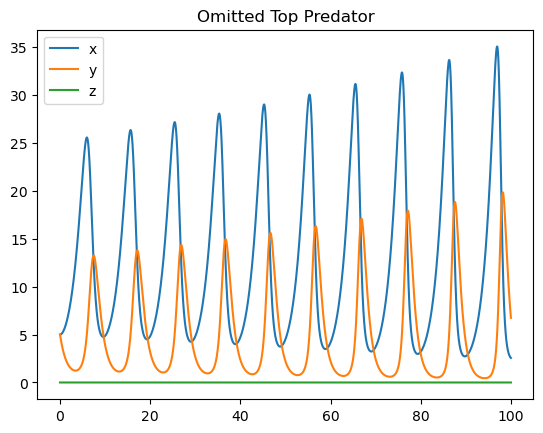

In [293]:
# independant change rates
a, c, f = 0.5,1,1
# dependant change rates
b, d, e, g = 0.1,0.08,1,1

t, P, y, z = euler(5, 5, 0, lotka_volterra_extension, 0.02, 100)
plt.plot(t, P, label='x'), plt.plot(t, y, label='y'), plt.plot(t, z, label='z')
plt.legend()
plt.title('Omitted Top Predator')

Now consider the removal of our top predator; $z$, such that there exists no starting population: $z_0=0$. We can see that removal of the top predator simplfies the equation to:

$$ x_{i+1} = x_i + h(ax_i - bx_iy_i) $$
$$ y_{i+1} = y_i + h(-cy_i + dx_iy_i) $$
$$ z_{i+1} = 0 $$

It would appear that our 3 species Lotka-Volterra model has reduced to the 2 species equation. We can use this oppurtunity to examine a simplified discrete model.

Previously we mentioned $x$ overshooting into the negative and we could niavely see this but now we can get a better understanding of what is happening.

by simple algebra we can determine that the stationary points of the discrete systems are: $ (0,0),(\frac{c}{d}\frac{a}{b}) $ with $z$ any real number. These will be further discussed in Part 4

Text(0.5, 0.92, 'Omitted top predator curve')

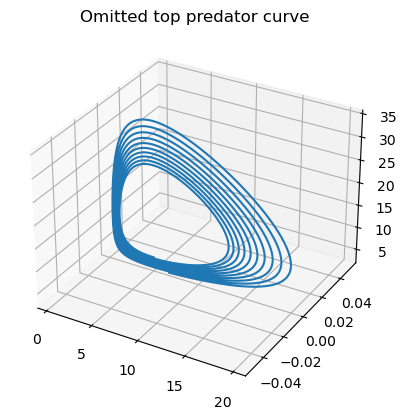

In [294]:
# independant change rates
a, c, f = 0.5,1,1
# dependant change rates
b, d, e, g = 0.1,0.08,1,1

t,x,y,z = euler(5, 5, 0, lotka_volterra_extension, 0.02, 100)
plt.figure().add_subplot(projection='3d')
plt.plot(y, z, x, label='parametric curve')
plt.title('Omitted top predator curve')

Above is the parametric equation in the absence of a top predator z

### Part 3 (7 marks) - Continuous time analysis

Let’s see what happens if we move to continous time now. Express your system as a set of
differential equations and, once again, simulate the behaviour of your system.
Do so for; * multiple initial conditions * multiple sets of model parameters * at least two
diferential equation solvers, including an RK2 implementation that should be included in
this submission.
Plot and explain your results, and be sure to point out any differences between discrete and
continuous time that you notice. Discuss how your results illuminate the question posed in
Part 1.

Text(0.5, 1.0, 'No Middle Species')

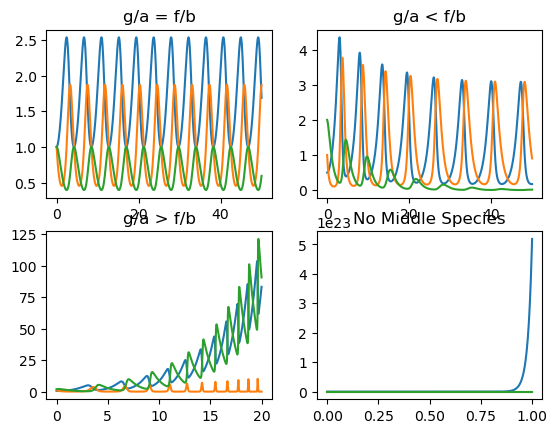

In [295]:
t = np.linspace(0, 50, 1000)
t1 = np.linspace(0, 20, 1000)
t2 = np.linspace(0, 1, 1000)

# independant change rates
a, c, f = 1, 1, 1
# dependant change rates
b, d, e, g = 1,1,1,1

P0 = np.array([1, 1, 1])
P = sp.integrate.odeint(lotka_volterra_extension, P0, t)
x1,y1,z1 = P.T

# independant change rates
a, c, f = 1, 1, 1
# dependant change rates
b, d, e, g = 1,1,1,0.88

P0 = np.array([1/2, 1, 2])
P = sp.integrate.odeint(lotka_volterra_extension, P0, t)
x2,y2,z2 = P.T

# independant change rates
a, c, f = 1, 1, 1
# dependant change rates
b, d, e, g = 1,1,1,1.6

P0 = np.array([1/2, 1, 2])
P = sp.integrate.odeint(lotka_volterra_extension, P0, t1)
x3,y3,z3 = P.T

# independant change rates
a, c, f = 1, 1, 1
# dependant change rates
b, d, e, g = 1,1,1,0.88

P0 = np.array([100, 0, 100])
P = sp.integrate.odeint(lotka_volterra_extension, P0, t)
x4,y4,z4 = P.T

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(t, x1), axs[0, 0].plot(t, y1), axs[0, 0].plot(t, z1)
axs[0, 0].set_title('g/a = f/b')
axs[0, 1].plot(t, x2), axs[0, 1].plot(t, y2), axs[0, 1].plot(t, z2)
axs[0, 1].set_title('g/a < f/b')
axs[1, 0].plot(t1, x3), axs[1, 0].plot(t1, y3), axs[1, 0].plot(t1, z3)
axs[1, 0].set_title('g/a > f/b')
axs[1, 1].plot(t2, x4), axs[1, 1].plot(t2, y4), axs[1, 1].plot(t2, z4)
axs[1, 1].set_title('No Middle Species')

Expressed are four different graphs showing the Lotka-Volterra method showing vastly different behaviour depending on the input parameters.

The graph in the top left shows a reasonable symbiotic relationship between the 3 species. It can be seen that the behaviour is periodic with all 3 species living in harmony. This is a common feature for those graphs who have parameter where $\frac{g}{a}=\frac{f}{b}$ under reasonable initial conditions $(x,y,z)$

For conditions where $\frac{g}{a}<\frac{f}{b}$ we find that the population of the top predator; z, dies out after a certain time and the model regresses to a form of the original 2 species model. This is seen with the graph in the top right

Bottom left is the result of initial parameters $\frac{g}{a}>\frac{f}{b}$. Here we see both the populations of x and z tending towards infinity while y's population has fluctuations that increase in frequency over time.

Finally the last graph is simply the result of an absence of a middle species $y$, where $z$ dies out and $x$ persists exponentially.

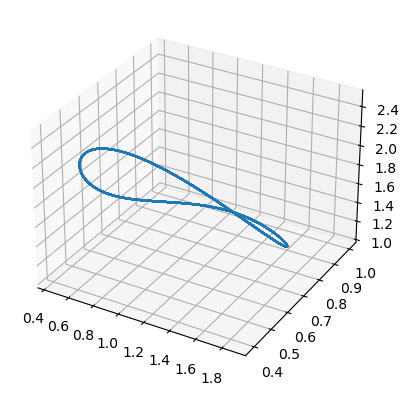

In [230]:
plt.figure().add_subplot(projection='3d')
plt.plot(y,z,P, label='parametric curve')

Shown is the parametric plot of the simplest form of our model. Note the difference in our continous and discrete parametric graphs. It would appear in our discrete solution that each population grows in a periodic nature, tending towards infnity for all 3 species, where the continous solution finds harmony, with certain maximums and minimums for each population and infinite different time intervals

In [284]:
def RK4(f, P0, t0, tf, h):
    t = np.arange(t0, tf, h)
    nt = t.size
    
    nP = P0.size
    P = np.zeros((nP,nt))
    
    P[:,0] = P0

    for k in range(nt-1):
        r_1 = h*f(P[:,k], t[k])
        r_2 = h*f(P[:,k] + r_1/2, t[k] + h/2)
        r_3 = h*f(P[:,k] + r_2/2, t[k] + h/2)
        r_4 = h*f( P[:,k] + r_3, t[k] + h)

        dP=(r_1 + 2*r_2 + 2*r_3 +r_4)/6
        P[:,k+1] = P[:,k] + dP;  
    
    return P, t

Text(0.5, 1.0, '4th order Runge-Kutta')

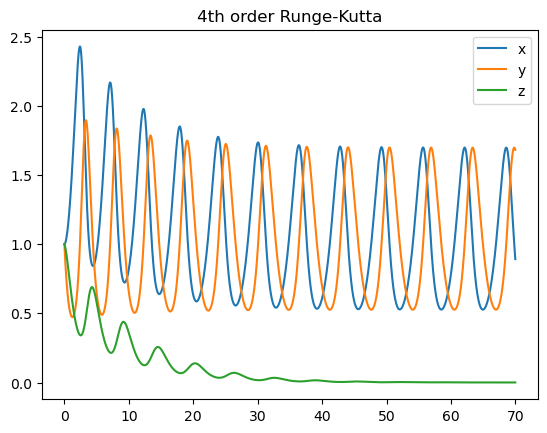

In [296]:
P0 = np.array([1,1,1])
t0 = 0
tf = 70
dt = 0.01

P, t = RK4(lotka_volterra_extension, P0, t0, tf, dt)

x, y, z = P

plt.plot(t, x, label='x'), plt.plot(t, y, label='y'), plt.plot(t, z, label='z')
plt.legend()
plt.title('4th order Runge-Kutta')

The above graph shows a 4th order Runge-Kutta method being used to calculate the populations when used on the parameters $a=b=c=d=e=f=1, g=0.88$. It can be observed that the its graph is very similar to the in-built odeint function used above with the same parameters 

### Part 4 (6 marks) - Steady state analysis

Some dynamical systems will eventually converge to a steady state, where the rate of change
for each variable is 0. For both, discrete and continuous time, discuss the steady states and
how they relate to the systems behaviour.
Does the model have any steady states? If so, where are they located? How stable are they?
Why? Discuss how your results illuminate the question posed in Part 1.
If your model is too involved to meaningfully produce steady state analysis and cobwebbing
diagrams, feel free to make some simplifications to your model for this task.

For our investigations of steady states, we will examine the model at $a=b=c=d=e=f=g=1$, our examination will also take place on simplified models where either $\frac{dx}{dt}$, $\frac{dy}{dt}$ or $\frac{dz}{dt}$ are equal to 0

In order to find steady states then:
$$\frac{dx}{dt} = 0$$
$$\frac{dy}{dt} = 0$$
$$\frac{dz}{dt} = 0$$


The obvious solution is at $(0,0,0)$, but by algebraic manipulation we can see that for the continous solution we have:

$$ 0 = ax - bxy, $$
$$ 0 = x(a - by) $$
$$ y = \frac{a}{b} $$

then substituting $ y\rightarrow \frac{dy}{dt} $

$$ 0 =  - c(\frac{a}{b}) + dx(\frac{a}{b}) - e(\frac{a}{b})z, $$
$$ x\frac{da}{b} =  - \frac{ca}{b} - \frac{ea}{b}z, $$
$$ x =  - \frac{c}{d} - \frac{e}{d}z, $$

substituting $ y\rightarrow \frac{dz}{dt} $

$$ 0 = - fz + g(\frac{a}{b})z $$
$$ 0 = z(-f + \frac{ga}{b}) $$

$\Rightarrow z = 0 $

hence we have a second solution $(\frac{c}{d},\frac{a}{b},0)$

Finding steady states for the discrete model


In [282]:
from sympy import symbols, Function
from sympy.solvers import solve
a,b,c,d,e,f,g,x,y,z,h = symbols('a,b,c,d,e,f,g,x,y,z,h', real=True)

def dx(x,y,z):
    return x + h*(a*x - b*x*y)

def dy(x,y,z):
    return y + h*(-c*y+d*x*y-e*y*z)

def dz(x,y,z):
    return z + h*(-f*z+g*y*z)

y_1 = solve(dx(x,y,z),y)[0]
x_1 = solve(dy(x,y_1,z),x)[0]
solve(dx(x_1, y_1, z),z)

x_1, y_1, 0

((c*h + e*h*z - 1)/(d*h), (a*h + 1)/(b*h), 0)

So by using the solve Sympy we were able to get the results for the discrete method. There still exists the obvious $(0,0,0)$ solution but there also exists solutions at:

$$ (\frac{ch + ehz - 1}{dh}, \frac{ah+1}{bh}, 0) $$
